In [1]:
#Importation des librairies

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud


from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, silhouette_score
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline


In [2]:
#importation du fichier SpotifyFeatures.csv sous forme de dataframe et affichage des 10 premières lignes

In [3]:

data = pd.read_csv('SpotifyFeatures.csv', encoding='ISO-8859-1')
data.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fÃ©es,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fÃ©es,"PremiÃ¨res recherches (par Paul Ventimila, Lor...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


In [4]:
#infos sur les données

In [5]:
data.info

<bound method DataFrame.info of         genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie        Martin & les fÃ©es  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity 

In [6]:
#Notre jeu de données contient 232725 lignes et 18 colonnes

In [7]:
#Vérification des types de données

In [8]:
data.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [9]:
#statistiques descriptives

In [10]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [11]:
#Les corrélations en heatmap

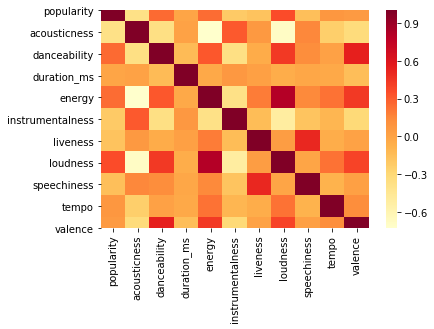

In [12]:
sns.heatmap(data.corr(),cmap="YlOrRd")

In [13]:
#forte corrélation positive entre energy et loudness
#forte corrélation négative entre: 1- accousticness et loudness 2-energy et accousticness

In [14]:
#Vérification des veleurs manquantes

In [15]:
data.isnull().any()

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool

In [16]:
#Notre jeu de données ne contient pas de valeurs manquantes

In [17]:
#vérification  des doublons

In [18]:
data = data.drop_duplicates()
data.shape

(232725, 18)

In [19]:
#Notre jeu de données ne contient pas de doublons

In [20]:
#Nombre de morceaux musicaux étudiés

In [21]:
data['track_name'].nunique()

148615

In [22]:
#Nombre d'artistes étudiés

In [23]:
data['artist_name'].nunique()

14564

In [24]:
#Artistes les plus écoutés

In [25]:
artistes = data['artist_name'].value_counts().reset_index().head(10)
print(artistes)

                     index  artist_name
0           Giuseppe Verdi         1394
1          Giacomo Puccini         1137
2   Kimbo Children's Music          971
3            Nobuo Uematsu          825
4           Richard Wagner          804
5  Wolfgang Amadeus Mozart          800
6             Randy Newman          757
7            Georges Bizet          701
8              Juice Music          684
9    Johann Sebastian Bach          632


In [26]:
#Visualisation des artistes les plus écoutés

Text(0.5, 1.0, 'Artistes les plus écoutés')

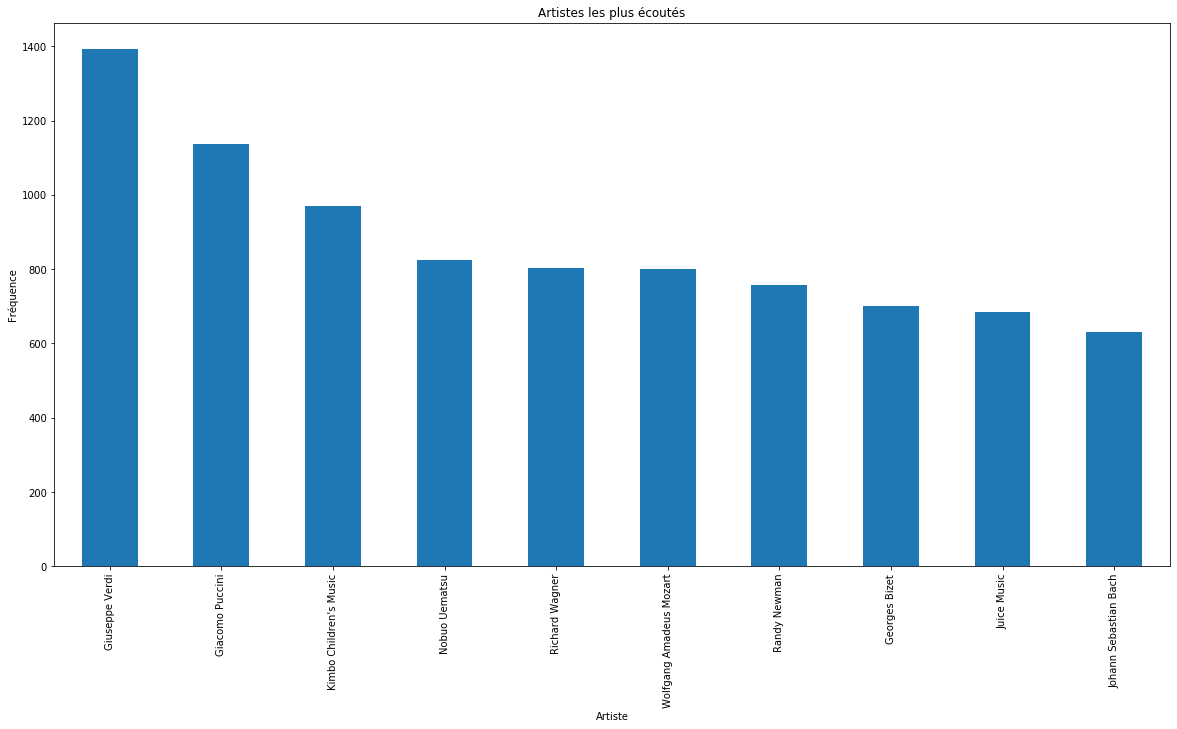

In [27]:
data['artist_name'].value_counts().head(10).plot.bar(figsize=(20,10))
plt.xlabel('Artiste')
plt.ylabel('Fréquence')
plt.title('Artistes les plus écoutés')

In [28]:
#Liste des 10 morceaux musicaux les plus écoutés

In [29]:
tracks = data['track_name'].value_counts().reset_index().head(10)
print(tracks)

         index  track_name
0         Home         100
1          You          71
2        Intro          69
3         Stay          63
4      Wake Up          59
5       Closer          58
6      Forever          57
7  Without You          56
8        Smile          55
9    Beautiful          50


In [30]:
#Visualisation des morceaux les plus écoutés

Text(0.5, 1.0, 'morceaux les plus écoutés')

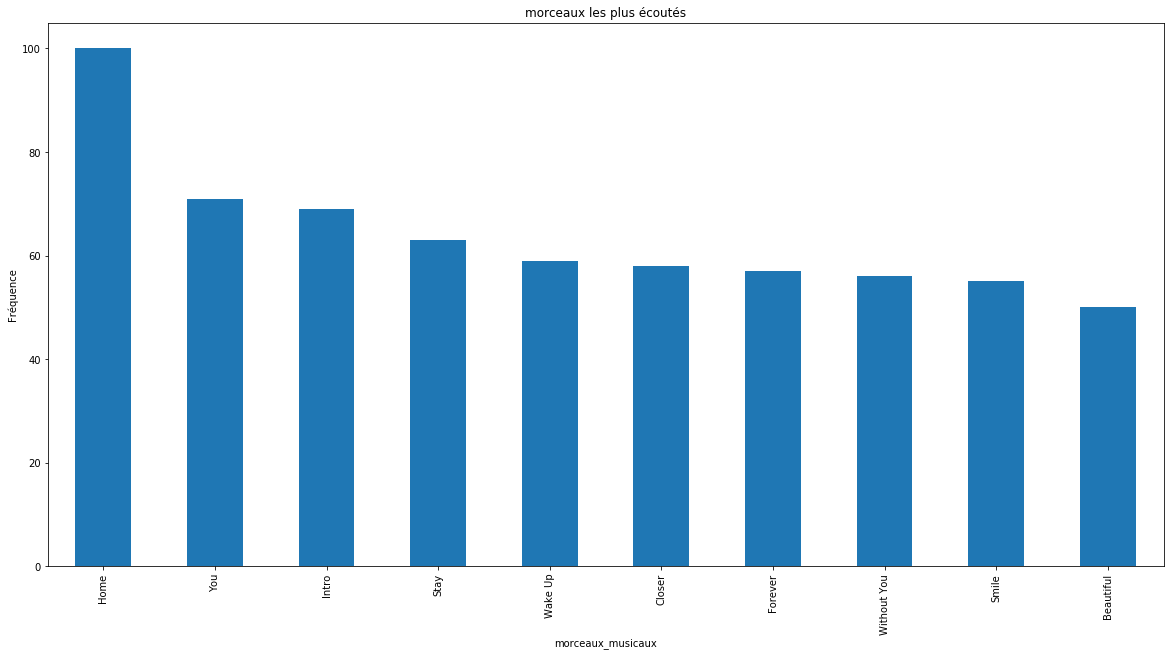

In [31]:
data['track_name'].value_counts().head(10).plot.bar(figsize=(20,10))
plt.xlabel('morceaux_musicaux')
plt.ylabel('Fréquence')
plt.title('morceaux les plus écoutés')

In [32]:
#Nombre de genres musicaux

In [33]:
data['genre'].nunique()

27

In [34]:
#Visualisation des différents genres musicaux

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


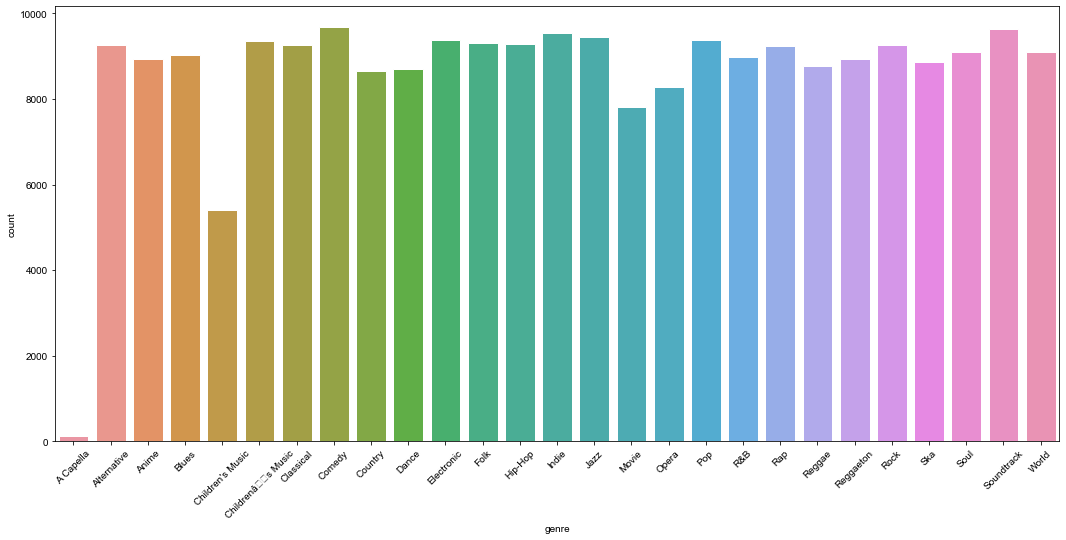

In [35]:
genres_col = data[['genre']].columns.values
for col in genres_col:
    df = data.groupby([col]).size().reset_index(name='count')
    plt.figure(figsize=(18,8))
    plt.xticks(rotation=45)
    sns.set_style("ticks")
    sns.barplot(data = df, x= col, y= 'count')

In [36]:
#Visualisation des genres les plus dominants

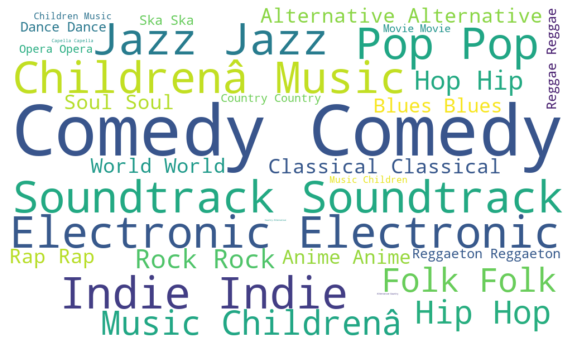

In [37]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 150,
                      background_color='white').generate(" ".join(data.genre))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
#Visualisation du mode

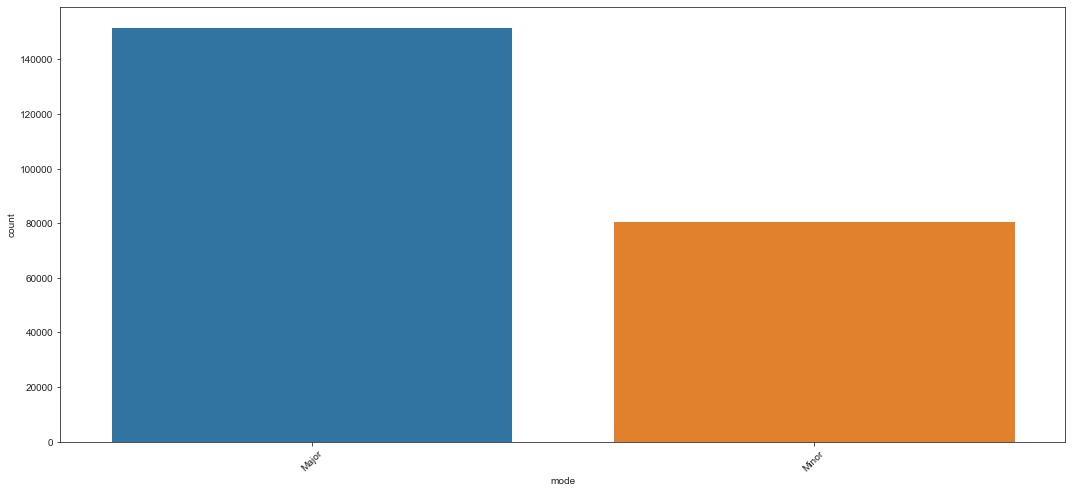

In [39]:
mode_col = data[['mode']].columns.values
for col in mode_col:
    dff = data.groupby([col]).size().reset_index(name='count')
    plt.figure(figsize=(18,8))
    plt.xticks(rotation=45)
    sns.set_style("ticks")
    sns.barplot(data = dff, x= col, y= 'count')

In [40]:
#La plupart des morceaux musicaux sont en mode Major

In [41]:
#Corrélations des 4 variables

In [42]:
Correlation=data[['acousticness','energy','valence','loudness']]

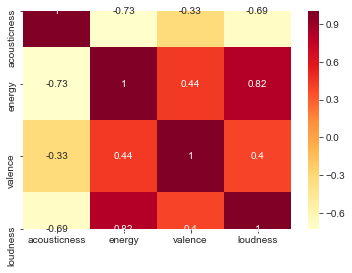

In [43]:
sns.heatmap(Correlation.corr(),annot=True,cmap="YlOrRd")

In [44]:
#Visualisation de la relation entre  energie et bruit

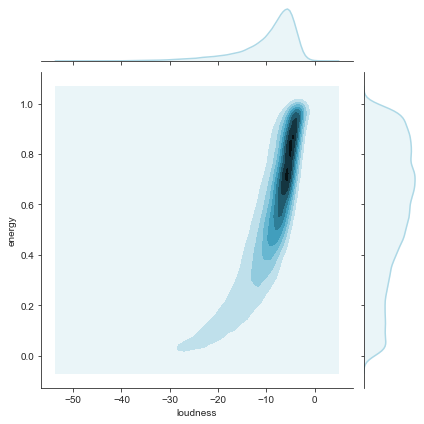

In [45]:
sns.jointplot(x=data['loudness'], y=data['energy'], data=data, kind="kde", color='lightblue');

In [46]:
#La distribution de l'attribut popularité

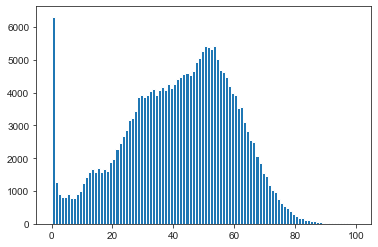

In [47]:
plt.hist(data['popularity'],bins=100)

plt.show()


In [48]:
#Il existe des morceaux musicaux dont la popularité=0

In [49]:
#Préparation des données

In [50]:
#Attributs sélectionnés : mode, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechness, tempo, valence
#Attributs supprimés : popularity, genre, key, mode, time_signature

data_features = data.drop(data.columns[[0, 1, 2, 3, 4, 10, 13, 16]], axis =1)

data_features.head()



,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


In [51]:
#Normalization des données pour avoir des valeurs entre  0 et 1 pour effectuer une analyse en composante principale (ACP)

In [52]:
from sklearn.decomposition import PCA

In [53]:
# Normalisation des données avec Min/Max

data_norm = data_features

scaler = MinMaxScaler() 

data_norm = scaler.fit_transform(data_norm)

data_norm = pd.DataFrame(data_norm, columns = data_features.columns)

data_norm.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,0.370041,0.533703,0.039681,0.571520,0.148450,0.207344,0.763102,0.104324,0.410719,0.454917
std,0.356193,0.199129,0.021478,0.263725,0.303071,0.200209,0.106728,0.196357,0.145390,0.260065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037751,0.405643,0.030243,0.385373,0.000000,0.088587,0.723937,0.015347,0.294461,0.237000
50%,0.232932,0.551550,0.037027,0.605598,0.000044,0.119485,0.795271,0.029530,0.401832,0.444000
75%,0.724900,0.681365,0.045215,0.787783,0.035836,0.256813,0.835501,0.087638,0.511354,0.660000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


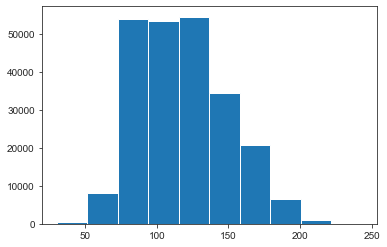

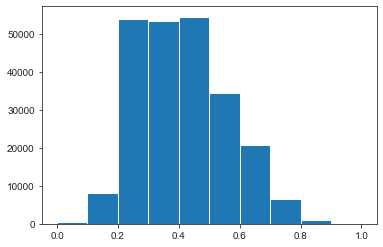

In [54]:
# Construction d'un histogramme pour montrer la difference 

plt.hist(data_features['tempo'], bins=10)     #données d'origine
plt.show()


plt.hist(data_norm['tempo'], bins=10)          #données standardisées
plt.show()

In [55]:
#ACP pour réduire les colonnes des attributs

In [56]:
#Ajuster l'algorithme ACP avec nos données

pca = PCA().fit(data_norm)

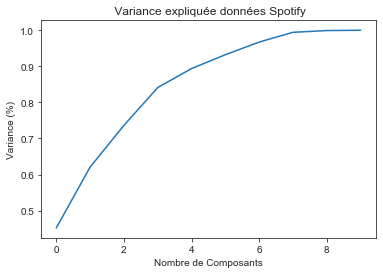

In [57]:
#Somme cumulée de la variance expliquée 

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de Composants')
plt.ylabel('Variance (%)') #for each component
plt.title(' Variance expliquée données Spotify')
plt.show()

In [58]:
#Affichage de la variance expliquée pour chaque composante

variance_expliquée = pca.explained_variance_ratio_

print(variance_expliquée)


[0.45195347 0.16864741 0.11569389 0.10483395 0.0526334  0.03844485
 0.03505718 0.0270522  0.00480037 0.00088328]


In [59]:
#Variance expliquée pour les 8 composantes

print('La variance expliquée pour ces composantes est:  ', variance_expliquée[0:8].sum())

La variance expliquée pour ces composantes est:   0.9943163489617924


In [60]:
#Choix du nombre de composantes

pca = PCA(n_components = 8)

data_pca = pca.fit_transform(data_norm)

In [61]:
#Analyse des attributs et leurs interdépendances 

In [62]:
from pandas.plotting import scatter_matrix

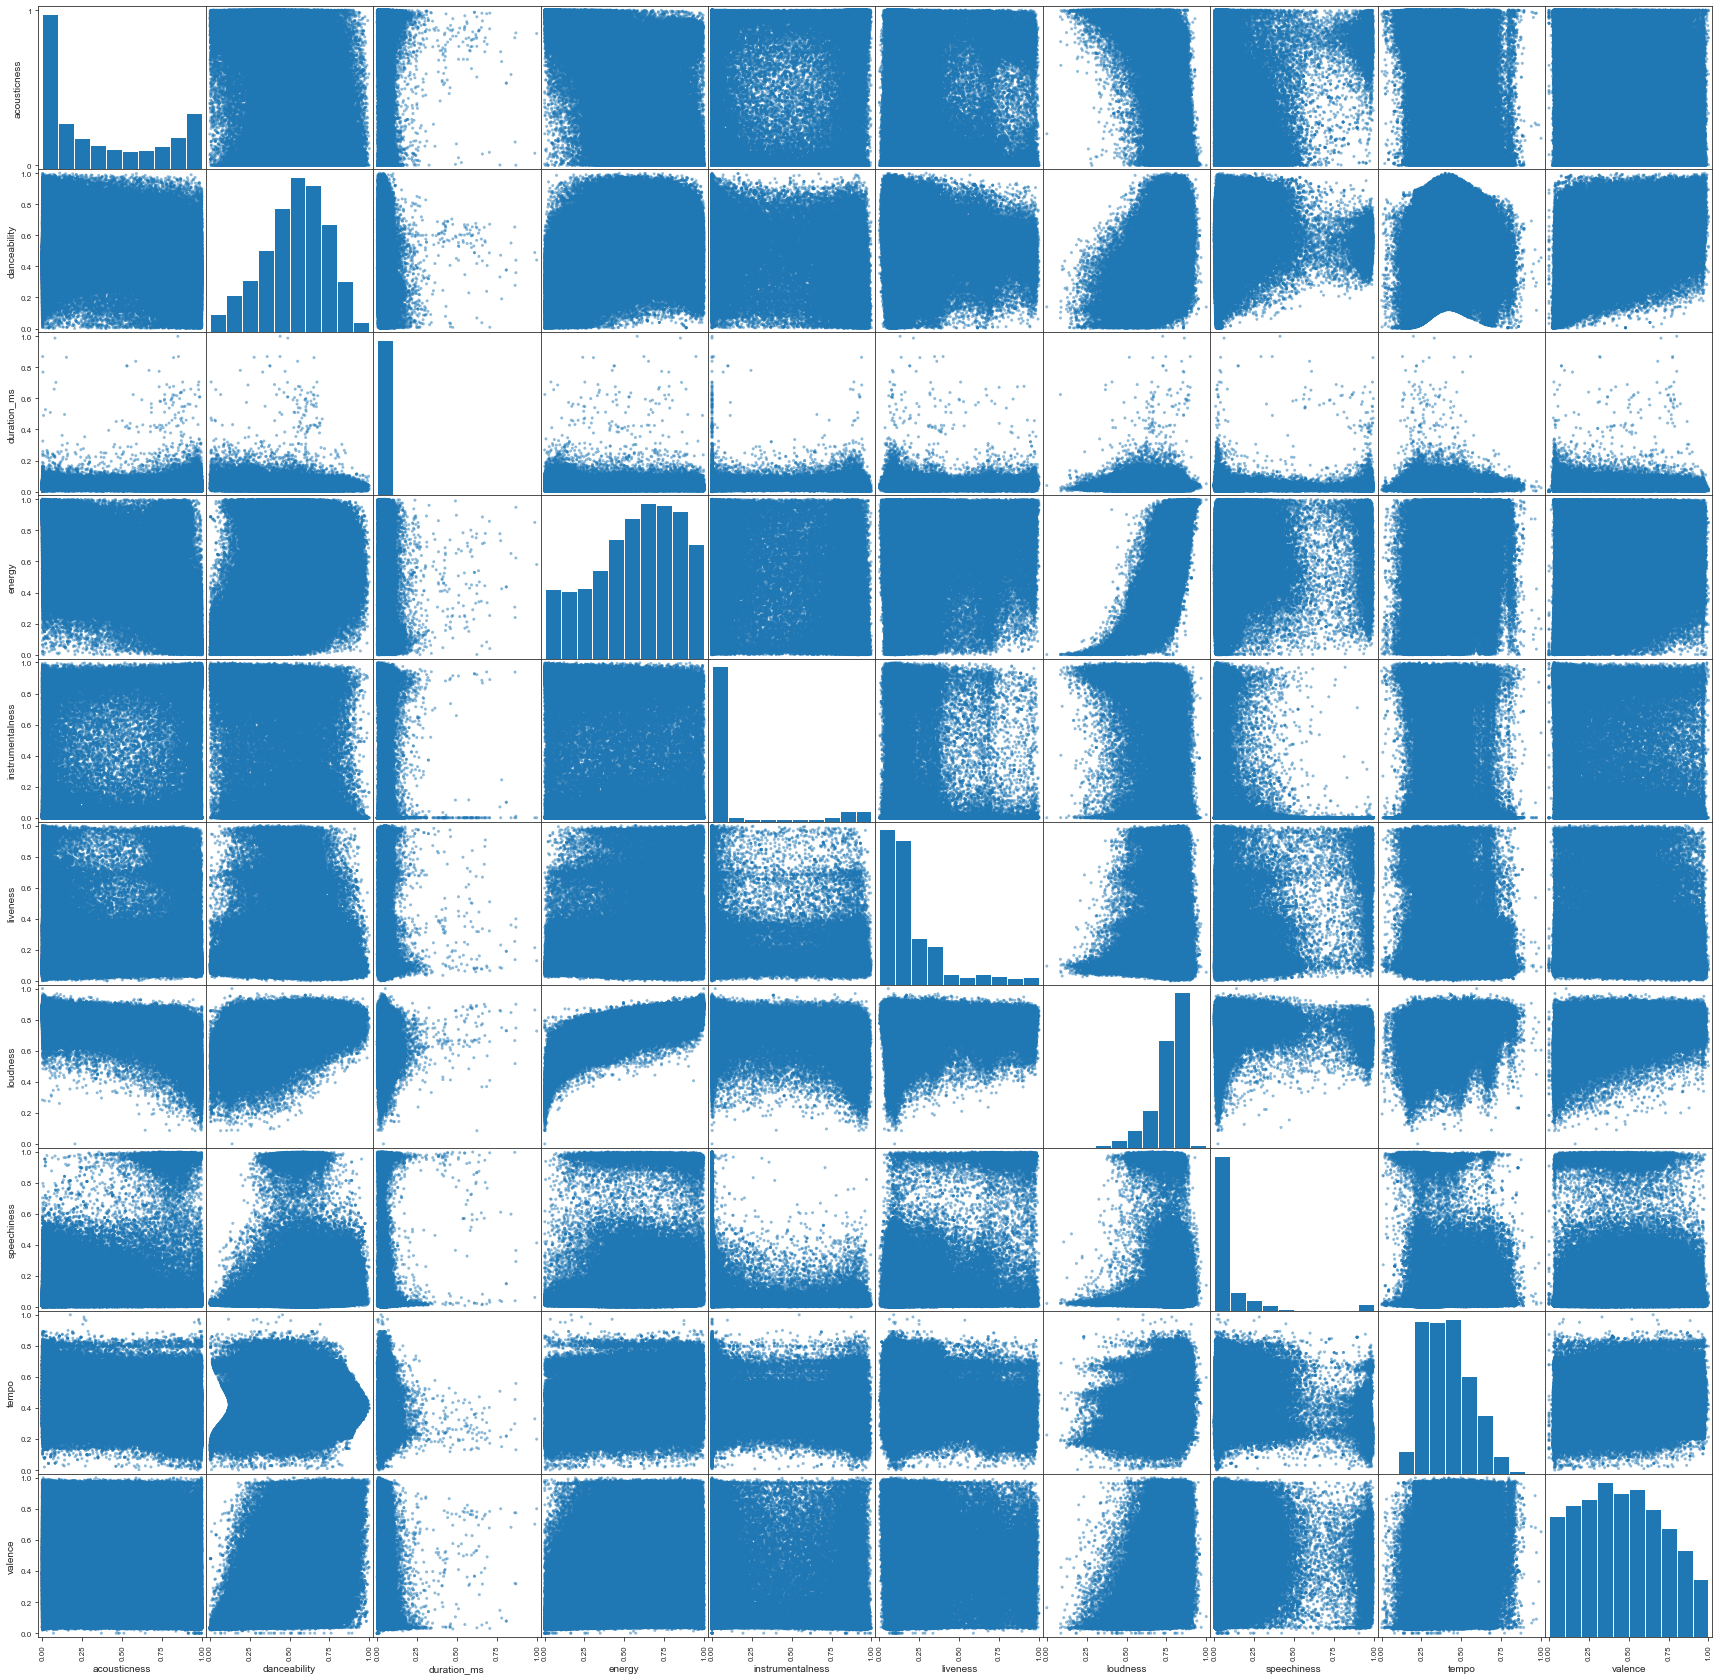

In [63]:
#Visualisation des relations entre tous les attributs 

scatter_matrix(data_norm)

plt.gcf().set_size_inches(30, 30)

plt.show()

In [64]:
#Utilisation de la corrélation spearman pour measurer les relations entre attributs 

pd.set_option('display.width', 100)
pd.set_option('precision', 3)

correlation = data_norm.corr(method='spearman')

print(correlation)

                  acousticness  danceability  duration_ms  energy  instrumentalness  liveness  \
acousticness             1.000        -0.243       -0.080  -0.703             0.176    -0.022   
danceability            -0.243         1.000       -0.093   0.221            -0.309    -0.060   
duration_ms             -0.080        -0.093        1.000   0.035             0.090    -0.034   
energy                  -0.703         0.221        0.035   1.000            -0.286     0.186   
instrumentalness         0.176        -0.309        0.090  -0.286             1.000    -0.155   
liveness                -0.022        -0.060       -0.034   0.186            -0.155     1.000   
loudness                -0.671         0.285        0.021   0.815            -0.395     0.080   
speechiness             -0.086         0.250       -0.122   0.267            -0.293     0.189   
tempo                   -0.251         0.025        0.009   0.224            -0.062    -0.011   
valence                 -0.283

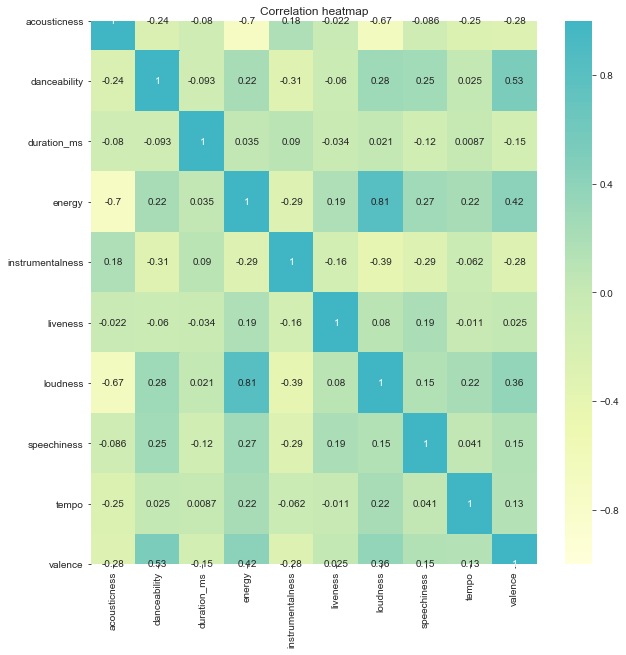

In [65]:
# heatmap des corrélations pour visualiser les relations entre attributs 

plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')

sns.heatmap(correlation, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", center=1)

In [66]:
#Partie3 - Recommandations de musique
#Former des Playlists en se basant sur les charactéristiques d'attributs en utilisant les techniques de Machine Learning  K-Means Clustering

In [67]:
#Normalisation des données pour fixer le skew et avoir  mean=0 et std=1 afin de faire du clustering 

In [68]:
#Trouver le skew pour chaque attribut

skew = data_features.skew()

print(skew)

acousticness        0.534
danceability       -0.378
duration_ms         9.893
energy             -0.400
instrumentalness    1.820
liveness            2.074
loudness           -1.662
speechiness         3.311
tempo               0.403
valence             0.144
dtype: float64


In [69]:
#Normalization des données

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_features)

data_scaled = pd.DataFrame(data_scaled)

data_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.683,-0.891,-1.141,1.287,-0.490,0.661,1.291,-0.368,1.596,1.381
1,-0.345,0.192,-0.822,0.630,-0.490,-0.323,0.669,-0.183,1.823,1.388
2,1.645,0.585,-0.545,-1.670,-0.490,-0.565,-0.718,-0.456,-0.588,-0.334
3,0.943,-1.694,-0.695,-0.930,-0.490,-0.588,-0.435,-0.438,1.751,-0.876
4,1.639,-1.203,-1.282,-1.313,-0.084,-0.066,-1.931,-0.405,0.741,-0.250


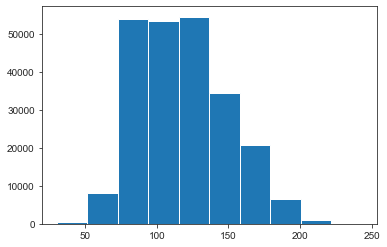

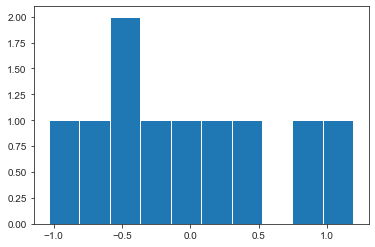

In [70]:
#La différence en histogramme

plt.hist(data_features['tempo'], bins=10)                    #données d'origine
plt.show()

plt.hist(data_scaled.iloc[8], bins=10)                            #données normalisées
plt.show()

In [71]:
#Trouver le nombre de clusters approprié

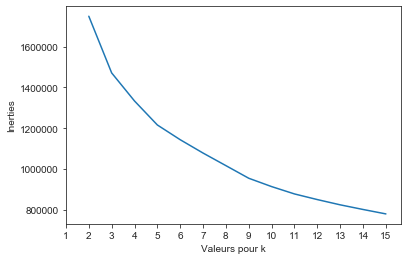

In [72]:
#Trouver le meilleur nombre de clusters en utilisant la méthode elbow et inértie


k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 
inertias = []

for i in k:
    km = KMeans(n_clusters=i, max_iter=1000, random_state=42)
    km.fit(data_scaled)
    inertias.append(km.inertia_)

plt.plot(k, inertias)
plt.xlabel("Valeurs pour k")
plt.ylabel("Inerties")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

plt.show()

In [73]:
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

score=[]

for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    score.append(silhouette_score(data_scaled, kmeans.labels_))
    
    print('Score Silouhette pour %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Score Silouhette pour 2 Clusters: 0.3148
Score Silouhette pour 3 Clusters: 0.3461
Score Silouhette pour 4 Clusters: 0.2045
Score Silouhette pour 5 Clusters: 0.1730
Score Silouhette pour 6 Clusters: 0.1818
Score Silouhette pour 7 Clusters: 0.1841
Score Silouhette pour 8 Clusters: 0.1701
Score Silouhette pour 9 Clusters: 0.1742
Score Silouhette pour 10 Clusters: 0.1681
Score Silouhette pour 11 Clusters: 0.1707
Score Silouhette pour 12 Clusters: 0.1641
Score Silouhette pour 13 Clusters: 0.1633
Score Silouhette pour 14 Clusters: 0.1543
Score Silouhette pour 15 Clusters: 0.1534


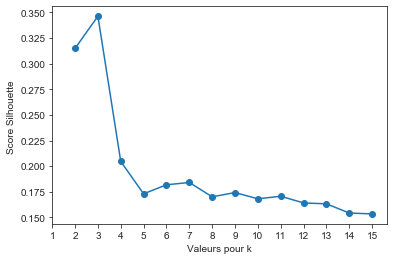

In [74]:
#Visualisation des options de clusters

plt.plot(k, score, 'o-')
plt.xlabel("Valeurs pour k")
plt.ylabel("Score Silhouette ")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

plt.show()

In [75]:
#Fixation du  nombre de clusters
kclusters = 8


#Exécution du k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=42).fit(data_scaled)

#Vérification des titres de clusters  
kmeans.labels_[0:13]

array([1, 1, 7, 7, 7, 7, 6, 7, 5, 5, 3, 3, 2], dtype=int32)

In [76]:
#Ajout des titres de clusters au tableau
data.insert(0, 'Numéro Playlist', kmeans.labels_)

In [77]:


data.head()

,Numéro Playlist,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.346,-1.828,Major,0.052,166.969,4/4,0.814
1,1,Movie,Martin & les fÃ©es,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.151,-5.559,Minor,0.087,174.003,4/4,0.816
2,7,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.103,-13.879,Minor,0.036,99.488,5/4,0.368
3,7,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.099,-12.178,Major,0.040,171.758,4/4,0.227
4,7,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.202,-21.150,Major,0.046,140.576,4/4,0.390


In [79]:
#Playlist 1

In [80]:
data.loc[data['Numéro Playlist'] == 0, data.columns[[3, 4]]]

,track_name,track_id
108,Symphony No.1 In C Major : IV. Allegro Vivace,3aX2M9VIuxxRIZ464VQwwc
341,Snow White and the Seven Dwarfs: Dwarf's Yodel...,73sd74Cr6cUvW6Z60IrOUf
530,There You Are,76Fy5YGapVZ4fGCbmrUqVT
1116,Seven Nation Army,7i6r9KotUPQg3ozKKgEPIN
1206,Bullet With Butterfly Wings - Remastered 2012,6GtX0jaNL8IjVQfrDBx81z
...,...,...
232608,Summer of my Discontentment,0cpFkw4zD4Rjvf9Tcm6zVa
232623,What They Doin?,7s0BKoeNy67NDPayTv5Xd2
232643,SOLE M8S,0xFJq8ctU0UNvovSO9jJoQ
232673,Stay Forever,7ln53hzSdrXrucU2gMlWTt


In [81]:
#Playlist 2

In [82]:
data.loc[data['Numéro Playlist'] == 1, data.columns[[3, 4]]]

,track_name,track_id
0,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
19,Ladies And Gentlemen,12ZjoNweObu1k9rK4SOSdL
30,A ty siÄ Åmiejesz ze mnie,1KVSUAEvXBSlARo03y4YYG
51,Animauxville (DÃ©part) - Live,24YkUVThOdm5kpX15kcK8Q
...,...,...
232688,If I Don't Have You,64NrwdHmYQjYdHdUVWV7ED
232693,Drama,1FAL6jmxa7oIZxmqZFZZL4
232699,Work to Do,1b7tZPt3S2UN6OrPUBqGCp
232717,P.O.P.,2gGqKJWfWbToha2YmDxnnj


In [83]:
#Playlist 3

In [84]:
data.loc[data['Numéro Playlist'] == 2, data.columns[[3, 4]]]

,track_name,track_id
12,J'ai demandÃ© Ã la lune,0jF6HUm18fg6QQCLHhfhC0
18,Veunise,113pHPsGwyeklEjLhnB3ZT
59,Shree Ram Chant,2MkMN3nFkYzdXlYrhAS0GJ
85,Rap-a-Cito,316vZ2FFcGlhI7XDld9fay
90,Shanthi Koru,3Cr09kBxG7FE9fvbSPlcIN
...,...,...
232706,Tear U Down,5sPmIcJR29nJUQ1hBYj1hi
232708,Tucked Off Shawty / Touchdown,7sdNLDhBqx8HLa3B6uH5Sw
232712,You're The One For Me,3UzHyDmqpBJR2J65h0702t
232714,They Like It Slow,2XoAEpBuM4AtQIQYUEowRy


In [85]:
#Playlist 4

In [86]:
data.loc[data['Numéro Playlist'] == 3, data.columns[[3, 4]]]

,track_name,track_id
10,Symphony No.4 In E Minor Op.98 : IV. Allegro E...,0XKgegoxLcIihK3Klpfo3N
11,The Hanging (Maverick - Original Motion Pictur...,0hprxsuRM5vVCOfaM7l3gQ
14,Keys of Love,0pXwl2CRP5awxHsF9eET3L
38,Afterglow,1j6b29LbEnEqbn8aswj4p1
41,"BourrÃ©e, From English Suite No. 2, BWV 807",1ppTRhpfunYl8Jd3Hfckee
...,...,...
232413,Bossa Antigua,5kapVb34raTBsynt0Zj6qw
232478,Georgia On My Mind,5v5h0IdOAo0pK8a7i2esZG
232495,Ice Cream,4IjRsPOrF1qXr6zUzigQ4J
232548,Waltz for Debby (Take 2),49H4LDNFE5BU7ZMIg8UsZy


In [87]:
#Playlist 5

In [88]:
data.loc[data['Numéro Playlist'] == 6, data.columns[[3, 4]]]

,track_name,track_id
6,"PremiÃ¨res recherches (par Paul Ventimila, Lor...",0NUiKYRd6jt1LKMYGkUdnZ
31,Une journÃ©e d'Ã©cole qui s'achÃ¨ve (par VÃ©ro...,1LFky4DBeOLzVWbg0avgod
44,Dancing with Gene,1qCTyNzxGkFXnvdrqT5olw
52,Sketch producteur (suite),279g1SI8xH7ItKaJxM6TLI
54,L'Ãne chargÃ© d'Ã©ponges et l'Ãne chargÃ© de...,2BF5SlaZRL0sYUDBgwjmbo
...,...,...
231214,Stars,2mGdIBIKa8lEkm1xtmIJmU
231341,Elaine Brown (Interlude),7wobmC9Xz4stYN1ZVLWgi5
231829,Soul - Hidden Track,3P3xONUKHDynX6Fs93VHZl
231834,Mystery of Iniquity - Live,5KZwRD3KklSP73jnLoNWtF


In [89]:
#Playlist 6

In [90]:
data.loc[data['Numéro Playlist'] == 7, data.columns[[3, 4]]]

,track_name,track_id
2,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,Ouverture,0IuslXpMROHdEPvSl1fTQK
5,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj
7,Let Me Let Go,0PbIF9YVD505GutwotpB5C
...,...,...
232705,Ruler of My Heart,6xiiZYr0zysI7wbEQlbpei
232707,How I Feel,5yEquyU4vMyFe4KDJdj5tn
232715,Down,5cA0vB8c9FMOVDWyJHgf26
232719,I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA


In [91]:
#Playlist 7

In [92]:
data.loc[data['Numéro Playlist'] == 8, data.columns[[3, 4]]]

,track_name,track_id
